# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;

 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.


During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)

Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


# Loading and Displaying data and Training baseline models

In [164]:
# Common imports
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os, time
import pandas as pd

# Import tensorflow and sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

24


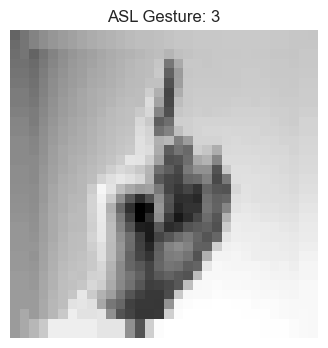

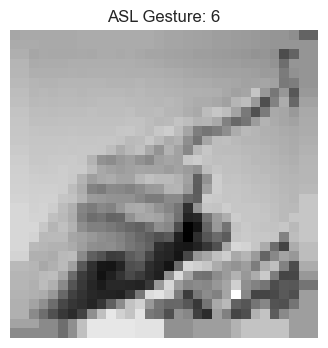

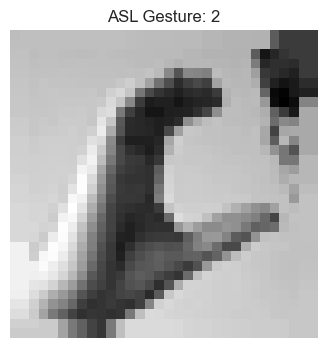

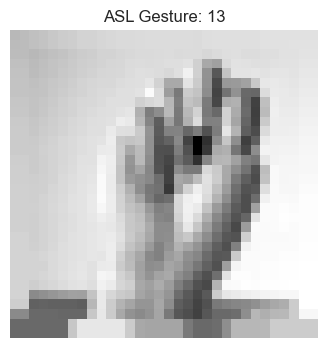

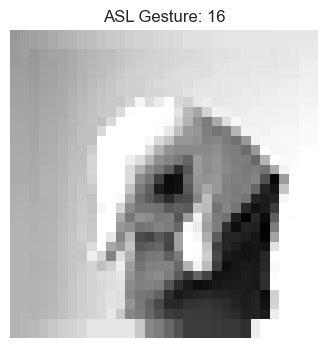

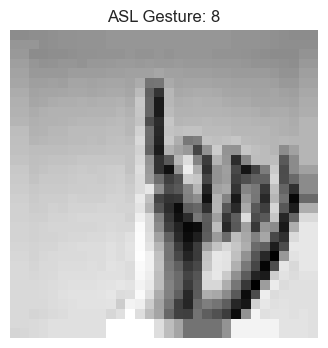

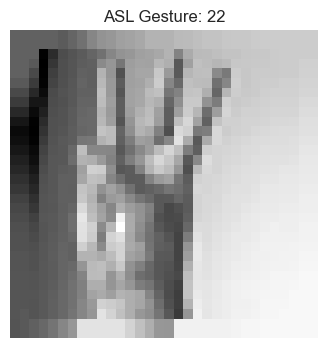

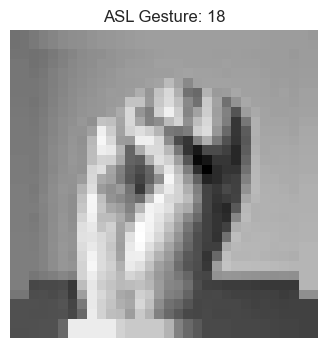

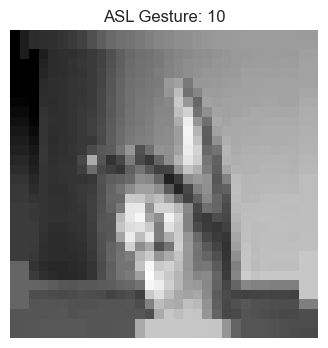

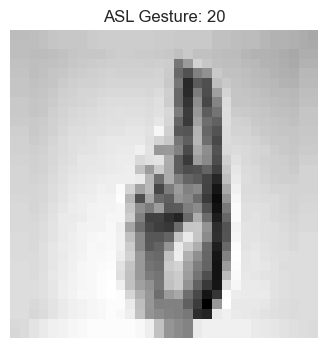

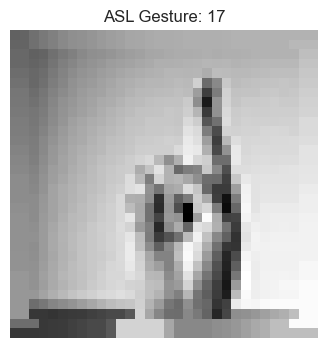

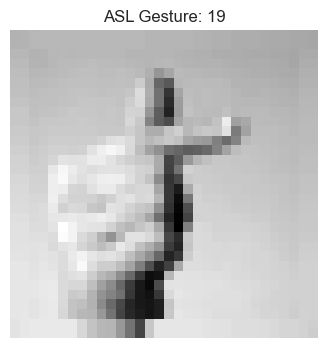

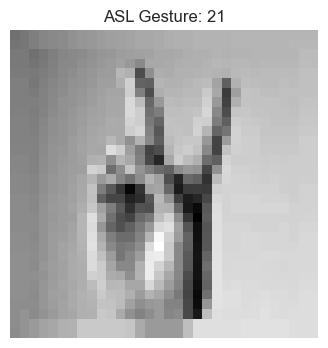

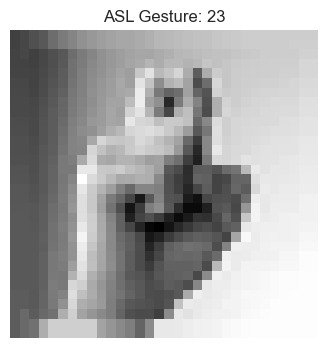

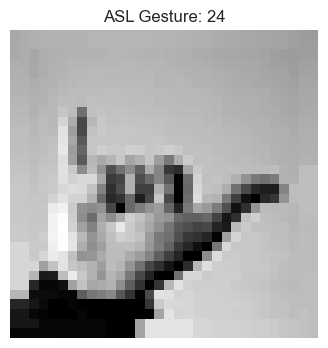

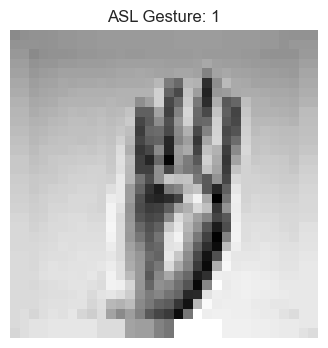

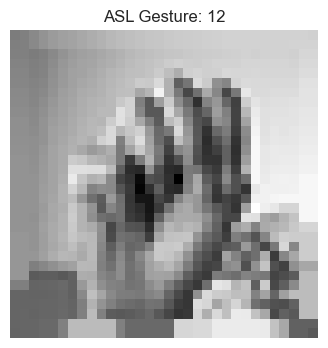

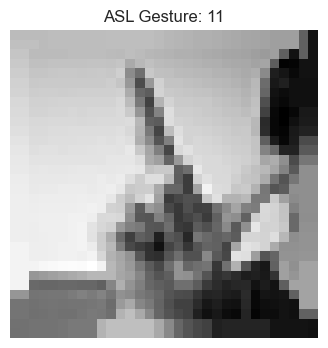

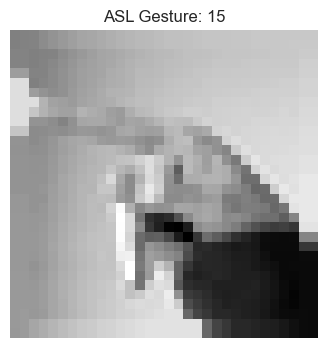

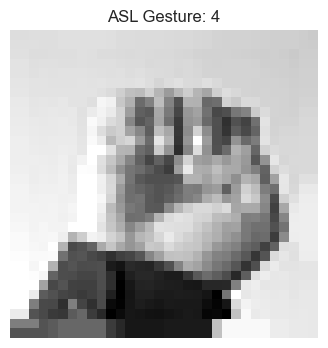

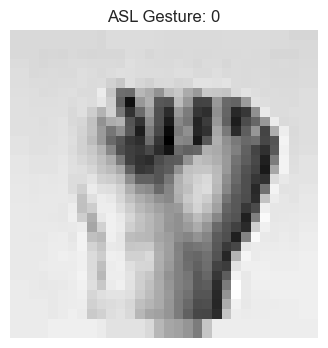

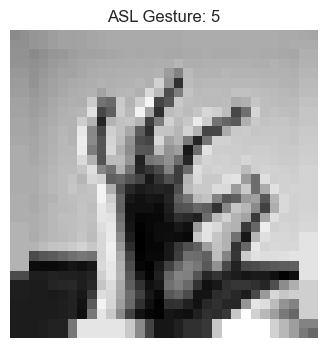

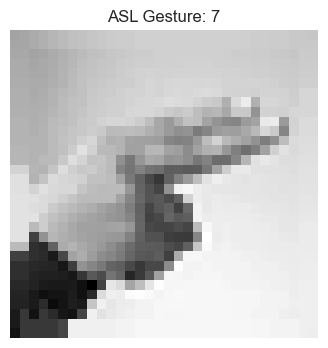

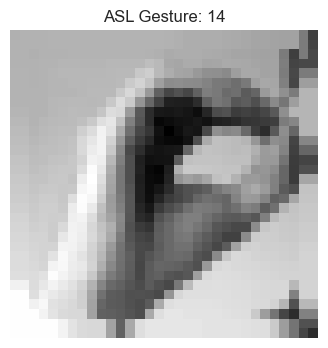

In [166]:
# loading the data and displaying a sample of each letter

df_train = pd.read_csv('Assignment3_UMLT_2024/sign_mnist_train.csv')
df_test = pd.read_csv('Assignment3_UMLT_2024/sign_mnist_test.csv')


labels = df_train['label'].unique()
print(len(labels))

# Displaying one sample image for each unique label
image_size = int(np.sqrt(df_train.shape[1] - 1)) 

for label in labels:
    sample = df_train[df_train['label'] == label].iloc[0, 1:].values
    image = sample.reshape((image_size, image_size))

    # Displaying the image
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f'ASL Gesture: {label}')
    plt.axis('off')  # To hide axes
    plt.show()

In [168]:
# Training both densely connected and CNN style models

# Split the data into training and testing sets
X_train = df_train.iloc[:, 1:]
X_train = X_train / 255.0
y_train = df_train.iloc[:, 0] 
y_test = df_test.iloc[:, 0]  
X_test = df_test.iloc[:, 1:]
X_test = X_test / 255.0

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5,random_state=42 )

print(X_test.shape)
print(X_valid.shape)

(3586, 1024)
(3586, 1024)


In [170]:
# Training densely connencted model
model1 = Sequential([
    Dense(256, input_shape=(1024,), activation='relu'),  # Input layer
    Dense(128, activation='relu'),  # First layer
    Dense(64, activation='relu'),   # Second layer
    Dense(32, activation='relu'),   # Third layer
    Dense(25, activation='softmax')  # Output layer
])

model1.summary()

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,457 (1.17 MB)

 Trainable params: 306,457 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
#Fitting the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1085 - loss: 2.9308 - val_accuracy: 0.3622 - val_loss: 1.8994
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4245 - loss: 1.6893 - val_accuracy: 0.5134 - val_loss: 1.5118
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5682 - loss: 1.2339 - val_accuracy: 0.5446 - val_loss: 1.4195
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6778 - loss: 0.9039 - val_accuracy: 0.5703 - val_loss: 1.3370
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7452 - loss: 0.6933 - val_accuracy: 0.6166 - val_loss: 1.3103
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.5305 - val_accuracy: 0.6732 - val_loss: 1.2682
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8423 - loss: 0.4340 - val_accuracy: 0.6110 - val_loss: 1.6430
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8797 - loss: 0.3358 - val_accuracy: 0.

In [174]:
# Evaluating the dense model
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}".format(accuracy))

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7649 - loss: 1.4914
Test Accuracy: 0.77


In [176]:
letters = np.unique(y_test)
predictions = model1.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracies = []
for letter in letters:
    mask = y_test == letter
    accuracy = accuracy_score(y_test[mask], predicted_labels[mask])
    accuracies.append(accuracy)
median_accuracy_model1 = np.median(accuracies)
print("Unbiased Median Accuracy:", median_accuracy_model1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
Unbiased Median Accuracy: 0.7588942307692308


In [178]:
# Letter with the highest accuracy
max_accuracy = max(accuracies)
best_letter = letters[np.argmax(accuracies)]
print("Highest Accuracy:", best_letter, "with accuracy:", max_accuracy)

Highest Accuracy: 2 with accuracy: 1.0


In [180]:
# Letter with the lowest accuracy
min_accuracy = min(accuracies)
worst_letter = letters[np.argmin(accuracies)]
print("Lowest Accuracy:", worst_letter, "with accuracy:", min_accuracy)

Lowest Accuracy: 18 with accuracy: 0.3220338983050847


In [182]:
# Three most common errors

# Convert model predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)

# Creating a confusion matrix
conf_mat = confusion_matrix(y_test, predicted_labels, labels=letters)

confmat_df = pd.DataFrame(conf_mat, index=letters, columns=letters)

# Finding misclassifications
misclassifications = confmat_df.stack().reset_index()
misclassifications.columns = ['True Label', 'Predicted Label', 'Error Count']
misclassifications = misclassifications[misclassifications['True Label'] != misclassifications['Predicted Label']]

# Sorting errors by count in descending order
misclassifications = misclassifications.sort_values('Error Count', ascending=False)
print(misclassifications.head(3))

     True Label  Predicted Label  Error Count
476          20               21           43
276          12               13           42
232          10               17           41


In [184]:
# Mean accuracy across all letters
mean_accuracy_model1 = np.mean(accuracies)
print("Overall Mean Accuracy:", mean_accuracy_model1)

Overall Mean Accuracy: 0.7603691668778105


In [188]:
# Displaying accuracy for each individual letter
for letter, accuracy in zip(letters, accuracies):
    print(f"Accuracy for {letter}: {accuracy:.2f}")

Accuracy for 0: 0.96
Accuracy for 1: 0.84
Accuracy for 2: 1.00
Accuracy for 3: 0.93
Accuracy for 4: 0.94
Accuracy for 5: 0.76
Accuracy for 6: 0.76
Accuracy for 7: 0.89
Accuracy for 8: 0.89
Accuracy for 10: 0.53
Accuracy for 11: 0.90
Accuracy for 12: 0.50
Accuracy for 13: 0.39
Accuracy for 14: 0.72
Accuracy for 15: 0.94
Accuracy for 16: 0.96
Accuracy for 17: 0.75
Accuracy for 18: 0.32
Accuracy for 19: 0.64
Accuracy for 20: 0.60
Accuracy for 21: 0.66
Accuracy for 22: 0.65
Accuracy for 23: 1.00
Accuracy for 24: 0.72


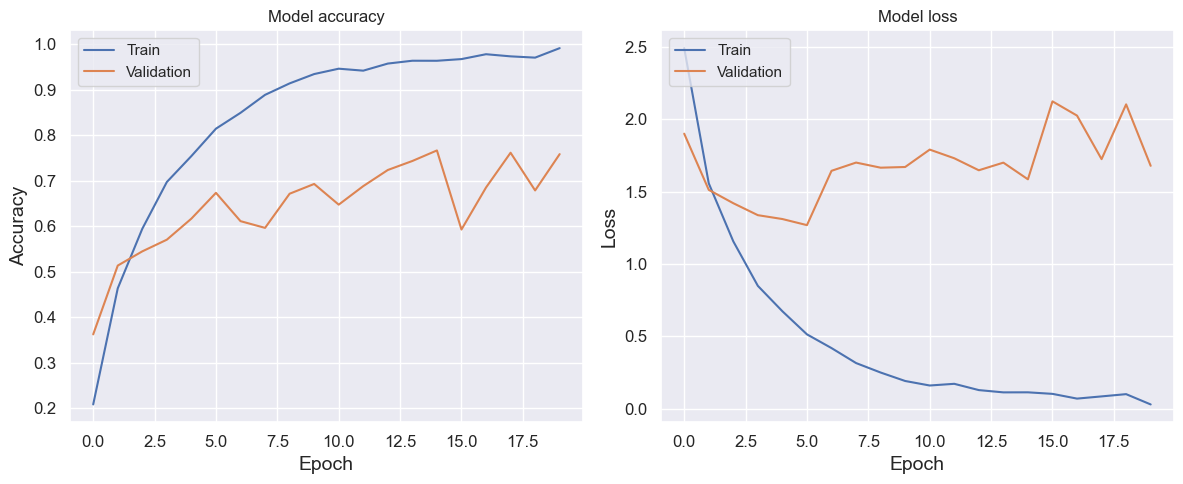

In [190]:
# Plotting the learning curves for both training and validation sets of Densely connected model(Model 1)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [192]:
# Traing CNN model (Model 2)

# Reshaping data for CNN input (if the images are 32*32 pixels)
image_size = int(np.sqrt(X_train.shape[1]))
X_train = X_train.values
X_test = X_test.values
X_valid = X_valid.values
X_train_cnn = X_train.reshape(-1, image_size, image_size, 1)
X_test_cnn = X_test.reshape(-1, image_size, image_size, 1)

In [194]:
# Reshaping data for CNN input (if the images are 32*32 pixels)
image_size = int(np.sqrt(X_train.shape[1]))
X_valid_cnn = X_valid.reshape(-1, image_size, image_size, 1)

In [196]:
# Defining the CNN model
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')
])
model2.summary()

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,561 (631.10 KB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

In [198]:
# Fitting the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model2 = model2.fit(X_train_cnn, y_train, epochs=5,  validation_data=(X_valid_cnn, y_valid), batch_size=32)

Epoch 1/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4486 - loss: 1.8371 - val_accuracy: 0.8915 - val_loss: 0.3493
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9906 - loss: 0.0459 - val_accuracy: 0.8901 - val_loss: 0.3750
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9985 - loss: 0.0095 - val_accuracy: 0.9074 - val_loss: 0.3569
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9998 - loss: 0.0029 - val_accuracy: 0.9317 - val_loss: 0.3081
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 1.0000 - loss: 4.0385e-04 - val_accuracy: 0.9350 - val_loss: 0.3152


In [200]:
# Evaluating the model
loss, accuracy = model2.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9445 - loss: 0.2651
Test Accuracy: 0.95


In [202]:
letters = np.unique(y_test)
predictions = model2.predict(X_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)
accuracies = []
for letter in letters:
    mask = y_test == letter
    accuracy = accuracy_score(y_test[mask], predicted_labels[mask])
    accuracies.append(accuracy)
median_accuracy_model2 = np.median(accuracies)
print("Unbiased Median Accuracy:", median_accuracy)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Unbiased Median Accuracy: 0.992922168867547


In [204]:
# Finding the letter with the highest accuracy
max_accuracy = max(accuracies)
best_letter = letters[np.argmax(accuracies)]
print("Letter with Highest Accuracy:", best_letter, "with accuracy:", max_accuracy)

Letter with Highest Accuracy: 0 with accuracy: 1.0


In [206]:
# Finding the letter with the lowest accuracy
min_accuracy = min(accuracies)
worst_letter = letters[np.argmin(accuracies)]
print("Letter with Lowest Accuracy:", worst_letter, "with accuracy:", min_accuracy)

Letter with Lowest Accuracy: 19 with accuracy: 0.7674418604651163


In [208]:
# Three most common errors

# Convert model predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, predicted_labels, labels=letters)
confmat_df = pd.DataFrame(conf_mat, index=letters, columns=letters)

# Find misclassifications 
misclassifications = confmat_df.stack().reset_index()
misclassifications.columns = ['True Label', 'Predicted Label', 'Error Count']
misclassifications = misclassifications[misclassifications['True Label'] != misclassifications['Predicted Label']]

# Sort errors by count in descending order
misclassifications = misclassifications.sort_values('Error Count', ascending=False)
print(misclassifications.head(3))

     True Label  Predicted Label  Error Count
454          19               23           28
215           8               24           17
412          18                4           13


In [210]:
# Mean accuracy across all letters
mean_accuracy_model2 = np.mean(accuracies)
print("Overall Mean Accuracy:", mean_accuracy_model2)

Overall Mean Accuracy: 0.9427907267242742


In [212]:
# Display accuracy for each individual letter
for letter, accuracy in zip(letters, accuracies):
    print(f"Accuracy for {letter}: {accuracy:.2f}")

Accuracy for 0: 1.00
Accuracy for 1: 1.00
Accuracy for 2: 1.00
Accuracy for 3: 0.91
Accuracy for 4: 1.00
Accuracy for 5: 1.00
Accuracy for 6: 0.94
Accuracy for 7: 0.98
Accuracy for 8: 0.86
Accuracy for 10: 0.94
Accuracy for 11: 1.00
Accuracy for 12: 0.99
Accuracy for 13: 0.87
Accuracy for 14: 0.92
Accuracy for 15: 0.94
Accuracy for 16: 1.00
Accuracy for 17: 0.86
Accuracy for 18: 0.89
Accuracy for 19: 0.77
Accuracy for 20: 0.96
Accuracy for 21: 0.86
Accuracy for 22: 1.00
Accuracy for 23: 0.99
Accuracy for 24: 0.93


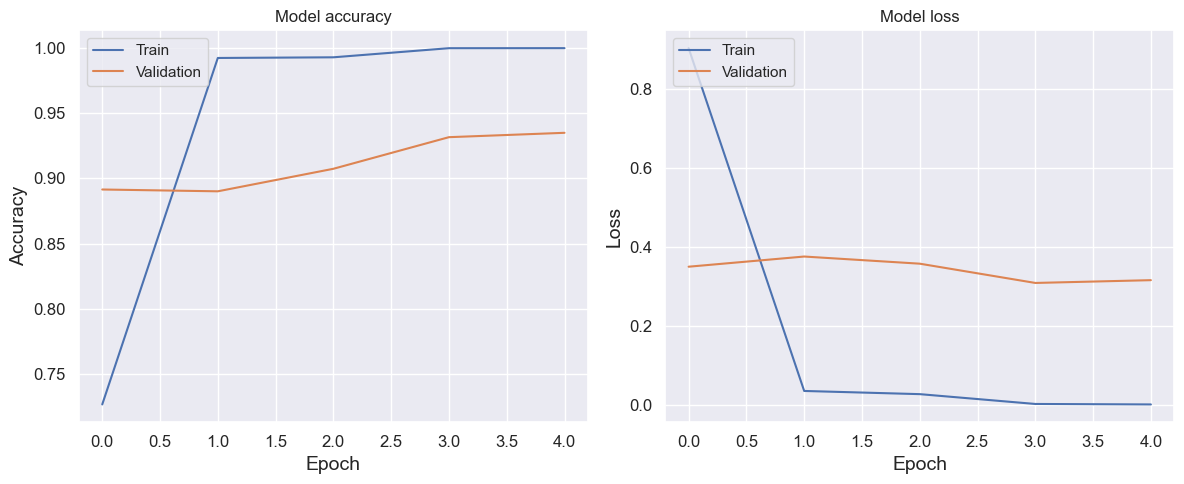

In [214]:
# Plotting the learning curves for both training and validation sets of CNN model(Model 2)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Optimizing the Models

In [85]:
# Optimization for Dense model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model1_optimized = Sequential([
    Dense(256, input_shape=(1024,), activation='relu'),  # Input layer
    BatchNormalization(),

    Dense(128, activation='relu'),  # First hidden layer
    BatchNormalization(),

    Dense(128, activation='relu'),  # Second hidden layer
    BatchNormalization(),

    Dense(64, activation='relu'),  # Third hidden layer
    BatchNormalization(),

    Dense(32, activation='relu'),  # Fourth hidden layer
    BatchNormalization(),

    Dense(32, activation='relu'),  # Fifth hidden layer
    BatchNormalization(),

    Dense(25, activation='softmax')  # Output layer
])

model1_optimized.summary()

model1_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,585 (1.25 MB)

 Trainable params: 325,305 (1.24 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [87]:
# Early Stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Learning Rate Scheduler 
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7)

history_model1_optimized = model1_optimized.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32, callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3991 - loss: 2.0808 - val_accuracy: 0.1339 - val_loss: 6.3291 - learning_rate: 0.0010
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8422 - loss: 0.5120 - val_accuracy: 0.2209 - val_loss: 4.3661 - learning_rate: 0.0010
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9136 - loss: 0.2712 - val_accuracy: 0.3787 - val_loss: 3.2560 - learning_rate: 0.0010
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.1971 - val_accuracy: 0.3898 - val_loss: 3.1466 - learning_rate: 0.0010
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9573 - loss: 0.1323 - val_accuracy: 0.4138 - val_loss: 3.1131 - learning_rate: 0.0010
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9482 - loss: 0.1687 - val_accuracy: 0.4373 - val_loss: 2.8217 - learning_rate: 0.0010
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9660 - loss: 0.1081 - 

In [89]:
# Evaluating the model
loss, accuracy = model1_optimized.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8230 - loss: 0.8987
Test Accuracy: 0.81


In [91]:
letters = np.unique(y_test)
predictions = model1_optimized.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracies = []
for letter in letters:
    mask = y_test == letter
    accuracy = accuracy_score(y_test[mask], predicted_labels[mask])
    accuracies.append(accuracy)
median_accuracy_model1_optimised = np.median(accuracies)
print("Unbiased Median Accuracy:", median_accuracy_model1_optimised)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
Unbiased Median Accuracy: 0.8005882352941176


In [113]:
# Finding the letter with the highest accuracy
max_accuracy = max(accuracies)
best_letter = letters[np.argmax(accuracies)]
print("Letter with Highest Accuracy:", best_letter, "with accuracy:", max_accuracy)

Letter with Highest Accuracy: 0 with accuracy: 1.0


In [115]:
# Finding the letter with the lowest accuracy
min_accuracy = min(accuracies)
worst_letter = letters[np.argmin(accuracies)]
print("Letter with Lowest Accuracy:", worst_letter, "with accuracy:", min_accuracy)

Letter with Lowest Accuracy: 21 with accuracy: 0.39344262295081966


In [117]:
# Three most common errors

# Convert model predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels, labels=letters)
cm_df = pd.DataFrame(cm, index=letters, columns=letters)

# Find misclassifications 
misclassifications = cm_df.stack().reset_index()
misclassifications.columns = ['True Label', 'Predicted Label', 'Error Count']
misclassifications = misclassifications[misclassifications['True Label'] != misclassifications['Predicted Label']]

# Sort errors by count in descending order
misclassifications = misclassifications.sort_values('Error Count', ascending=False)
print(misclassifications.head(3))

     True Label  Predicted Label  Error Count
192           8                0           35
501          21               22           33
419          18               12           28


In [119]:
# Mean accuracy for all letters
mean_accuracy_model1_optimised = np.mean(accuracies)
print("Overall Mean Accuracy:", mean_accuracy_model1_optimised)

Overall Mean Accuracy: 0.7995849073608351


In [121]:
# Displaying accuracy for each individual letter
for letter, accuracy in zip(letters, accuracies):
    print(f"Accuracy for {letter}: {accuracy:.2f}")

Accuracy for 0: 1.00
Accuracy for 1: 0.95
Accuracy for 2: 1.00
Accuracy for 3: 0.97
Accuracy for 4: 0.92
Accuracy for 5: 0.89
Accuracy for 6: 0.76
Accuracy for 7: 0.92
Accuracy for 8: 0.63
Accuracy for 10: 0.52
Accuracy for 11: 0.90
Accuracy for 12: 0.79
Accuracy for 13: 0.69
Accuracy for 14: 0.91
Accuracy for 15: 0.99
Accuracy for 16: 0.77
Accuracy for 17: 0.55
Accuracy for 18: 0.56
Accuracy for 19: 0.76
Accuracy for 20: 0.82
Accuracy for 21: 0.39
Accuracy for 22: 0.78
Accuracy for 23: 0.99
Accuracy for 24: 0.74


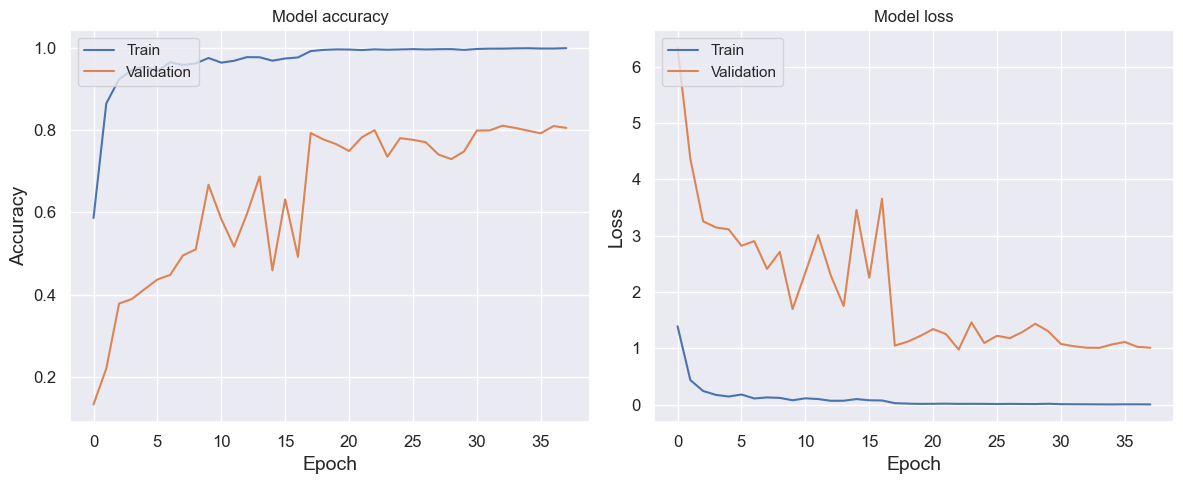

In [123]:
# Plotting the learning curves for both training and validation sets of Optimised Densely connected model(Model 1)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_model1_optimized.history['accuracy'])
plt.plot(history_model1_optimized.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model1_optimized.history['loss'])
plt.plot(history_model1_optimized.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [125]:
# Optimization for CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Define the CNN model
model2_optimized = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Third convolutional layer
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dropout(0.2),

    # Fully connected layer
    Dense(128, activation='relu'),

    # Output layer
    Dense(25, activation='softmax')
])

model2_optimized.summary()

model2_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,457 (634.60 KB)

 Trainable params: 162,009 (632.85 KB)

 Non-trainable params: 448 (1.75 KB)

In [127]:
# Early Stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Learning Rate Scheduler 
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7)

history_model2_optimized = model2_optimized.fit(X_train_cnn, y_train, epochs=50,  validation_data=(X_valid_cnn, y_valid), batch_size=32, callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6132 - loss: 1.3066 - val_accuracy: 0.9191 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9809 - loss: 0.0606 - val_accuracy: 0.9247 - val_loss: 0.2597 - learning_rate: 0.0010
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9877 - loss: 0.0363 - val_accuracy: 0.8424 - val_loss: 0.6728 - learning_rate: 0.0010
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.8912 - val_loss: 0.4369 - learning_rate: 0.0010
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9219 - val_loss: 0.2680 - learning_rate: 0.0010
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.8818 - val_loss: 0.6083 - learning_rate: 0.0010
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9949 - l

In [129]:
# Evaluating the model
loss, accuracy = model2_optimized.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9648 - loss: 0.1435
Test Accuracy: 0.97


In [240]:
letters = np.unique(y_test)
predictions = model2_optimized.predict(X_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)
accuracies = []
for letter in letters:
    mask = y_test == letter
    accuracy = accuracy_score(y_test[mask], predicted_labels[mask])
    accuracies.append(accuracy)
median_accuracy_model2_optimised = np.median(accuracies)
print("Unbiased Median Accuracy:", median_accuracy_model2_optimised)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Unbiased Median Accuracy: 0.992922168867547


In [242]:
# Finding the letter with the highest accuracy
max_accuracy = max(accuracies)
best_letter = letters[np.argmax(accuracies)]
print("Letter with Highest Accuracy:", best_letter, "with accuracy:", max_accuracy)

Letter with Highest Accuracy: 0 with accuracy: 1.0


In [222]:
# Finding the letter with the lowest accuracy
min_accuracy = min(accuracies)
worst_letter = letters[np.argmin(accuracies)]
print("Letter with Lowest Accuracy:", worst_letter, "with accuracy:", min_accuracy)

Letter with Lowest Accuracy: 6 with accuracy: 0.80625


In [224]:
# Three most common errors

# Convert model predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, predicted_labels, labels=letters)
confmat_df = pd.DataFrame(conf_mat, index=letters, columns=letters)

# Find misclassifications (off-diagonal elements)
misclassifications = confmat_df.stack().reset_index()
misclassifications.columns = ['True Label', 'Predicted Label', 'Error Count']
misclassifications = misclassifications[misclassifications['True Label'] != misclassifications['Predicted Label']]

# Sort errors by count in descending order
misclassifications = misclassifications.sort_values('Error Count', ascending=False)

# Print the three most common errors
print(misclassifications.head(3))

     True Label  Predicted Label  Error Count
151           6                7           20
560          24                8           16
268          12                4           15


In [228]:
# Mean accuracy across all letters
mean_accuracy_model2_optimised = np.mean(accuracies)
print("Overall Mean Accuracy:", mean_accuracy_model2_optimised)

Overall Mean Accuracy: 0.963043449097878


In [246]:
# Displaying accuracy for each individual letter
for letter_opt, accuracy_opt in zip(letters, accuracies):
    print(f"Accuracy for {letter_opt}: {accuracy_opt:.2f}")

Accuracy for 0: 1.00
Accuracy for 1: 1.00
Accuracy for 2: 1.00
Accuracy for 3: 1.00
Accuracy for 4: 1.00
Accuracy for 5: 1.00
Accuracy for 6: 0.81
Accuracy for 7: 0.99
Accuracy for 8: 0.99
Accuracy for 10: 1.00
Accuracy for 11: 1.00
Accuracy for 12: 0.93
Accuracy for 13: 0.94
Accuracy for 14: 0.95
Accuracy for 15: 0.97
Accuracy for 16: 1.00
Accuracy for 17: 0.89
Accuracy for 18: 0.89
Accuracy for 19: 0.94
Accuracy for 20: 0.99
Accuracy for 21: 1.00
Accuracy for 22: 1.00
Accuracy for 23: 0.94
Accuracy for 24: 0.90


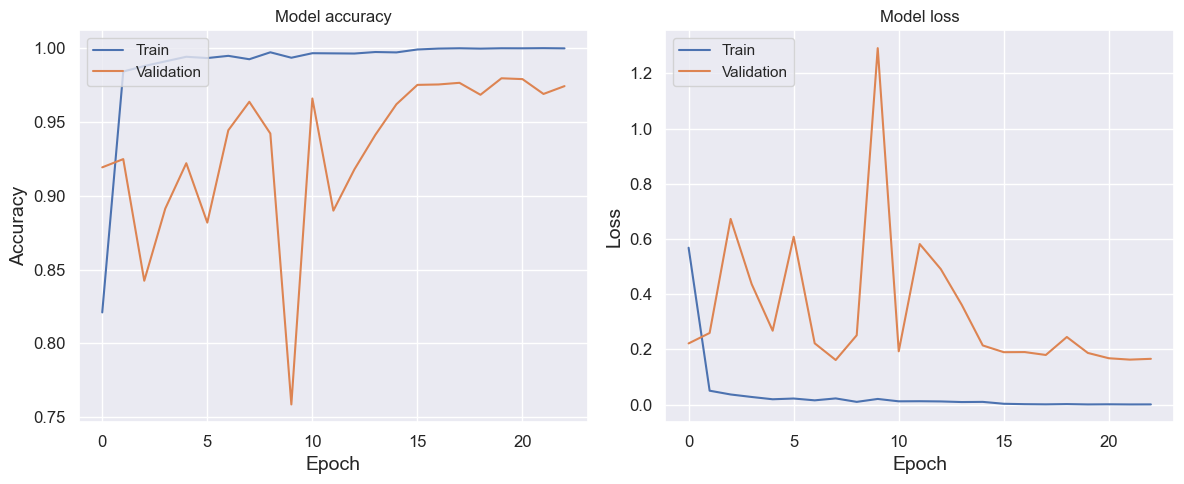

In [248]:
# Plotting the learning curves for both training and validation sets of Optimised CNN model(Model 2)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_model2_optimized.history['accuracy'])
plt.plot(history_model2_optimized.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model2_optimized.history['loss'])
plt.plot(history_model2_optimized.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Comparison and Selecting Best model

We have used two models - Densely connected model ( Model 1) and CNN model ( Model 2)

For the baseline models, Densely connected model showed a mean accuracy around 0.76 and meadian accuracy of 0.73 and CNN model showed a mean accuracy of 0.94 and median accuracy of 0.98
Comparitively baseline CNN model showed higher median accuracy and it satisfies the client's request of having a median accuracy gretaer than 94%.However it does not satisfy the condition that all inividual letters should show an accuracy of 85% and also the mean accuracy can be improved.

## Optimisation:

### Densely connected model : 
We have used Adam optimiser with a specific learning rate with a total parameter of 326,585 to optimise the densely connected model. 
The optimised model showed an overall mean accuaracy of 0.79 with highest individual of 1.0 and lowest 0.39 and median accuracy of 0.80

### CNN model :
We have used Adam optimiser with a specific learning rate with a total parameter count of 162,457 to optimise the CNN model.
The optimised model showed an overall mean accuaracy of 0.96 with highest individual of 1.0 and lowest 0.80 and median accuracy of 0.99

### Choosing best model
The selection of the best model was based on the overall median accuracy and the learning curve's performance in terms of reducing overfitting and improving validation accuracy. The optimized CNN model is selected as the final model as the median accuracy is around 0.99, which is the highest when compared to baseline CNN model (accuracy = 0.98), baseline densely connected model (accuracy = 0.73) and optimised densely connected model (accuracy = 0.80) and also the individual accuracies have improved overall.



In [250]:
print("Overall Mean Accuracy of Optimised CNN model:", mean_accuracy_model2_optimised)
print("Overall Median Accuracy of Optimised CNN model:", median_accuracy_model2_optimised)
# Displaying accuracy for each individual letter
for letter_opt, accuracy_opt in zip(letters, accuracies):
    print(f"Accuracy for {letter_opt}: {accuracy_opt:.2f}")

Overall Mean Accuracy of Optimised CNN model: 0.963043449097878
Overall Median Accuracy of Optimised CNN model: 0.992922168867547
Accuracy for 0: 1.00
Accuracy for 1: 1.00
Accuracy for 2: 1.00
Accuracy for 3: 1.00
Accuracy for 4: 1.00
Accuracy for 5: 1.00
Accuracy for 6: 0.81
Accuracy for 7: 0.99
Accuracy for 8: 0.99
Accuracy for 10: 1.00
Accuracy for 11: 1.00
Accuracy for 12: 0.93
Accuracy for 13: 0.94
Accuracy for 14: 0.95
Accuracy for 15: 0.97
Accuracy for 16: 1.00
Accuracy for 17: 0.89
Accuracy for 18: 0.89
Accuracy for 19: 0.94
Accuracy for 20: 0.99
Accuracy for 21: 1.00
Accuracy for 22: 1.00
Accuracy for 23: 0.94
Accuracy for 24: 0.90


Based on the current results, the desired results can be achieved by enhancing the model by tuning further. The optimised CNN 
model have shown better accuracy than the densely connected model. So further tuning can show a better performance for CNN model.